In [7]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt


# Thompson Sampling

## 1. initialization of the true value matrix 

In [8]:
#Create a 6x6 matrix with random values between 5 and 9
v = np.random.uniform(0, 0.99, (6,6))
N = 6       # Number of Agents 
np.fill_diagonal(v, 0)

v[0,1] = 1
v[1,0] = 1

v[2, 3] = 1
v[3,2] = 1

v[4,5] = 1
v[5,4] = 1


In [18]:
alpha_ = np.ones((N, N))
beta_ = np.ones((N, N))

In [5]:
v

array([[0.        , 1.        , 0.48344487, 0.04535006, 0.81070321,
        0.8227938 ],
       [1.        , 0.        , 0.5767019 , 0.22507478, 0.95487939,
        0.44460739],
       [0.42706644, 0.41402219, 0.        , 1.        , 0.60532144,
        0.3018782 ],
       [0.50574809, 0.87384195, 1.        , 0.        , 0.76181911,
        0.09403325],
       [0.54749572, 0.01669379, 0.15746253, 0.86872533, 0.        ,
        1.        ],
       [0.14929373, 0.89644092, 0.66305085, 0.60838263, 1.        ,
        0.        ]])

## 2. Thompson sampling: simulation

In [9]:
def observed_pairs(matrix):
    ' Given the binary allocation matrix returns the true observed pairings '
    n = len(matrix)
    result = []
    for i in range(n):
        for j in range(i+1, n):
            if matrix[i][j] == 1 and matrix[j][i] == 1:
                result.append((i, j))
    return result

In [10]:
def invert_offers(offers):
    ' function to invert the offers being made - returns the dictionary as index people, and values the list of recieved offers  '
    inverted_offers = {}
    for proposer, recipient in offers.items():
        inverted_offers.setdefault(recipient, []).append(proposer)
    return inverted_offers

In [11]:
import numpy as np

def sample_beta_distribution(x, alpha = 2, n=1):
    """
    Sample from a Beta distribution with a given expectation.
    
    Parameters:
    x (float): The desired expectation (0 < x < 1).
    alpha (float): The alpha parameter of the Beta distribution.
    n (int): The number of samples to generate.
    
    Returns:
    np.ndarray: Array of samples from the Beta distribution.
    """

    beta = alpha * (1 - x) / x
    print(beta)
    # Generate samples from the Beta distribution
    samples = np.random.beta(alpha, beta, n)
    return samples

In [12]:
T = 100

for t in range(T):

    ## Offers Phase 

    theta = np.zeros((N, N))
    offers = {}
    for i in range(N):
        for j in range(N):
            theta[i, j] = beta.rvs(alpha_[i,j], beta_[i,j], size = 1)[0]

        max_index =  np.argmax(theta, axis=1)
        offers[i] = max_index[i]

    ## Acceprtance Phase

    offers_recievers = invert_offers(offers)
    rho = np.zeros((N, N))

    m = np.zeros((N, N)) 
    
    ## stores the matches that take place
    for j in offers_recievers.keys():
        for k in offers_recievers[j]: 
            rho[j, k] = beta.rvs(alpha_[j, k], beta_[j, k], size = 1)[0]

        max_index =  np.argmax(rho, axis=1)
        m[j, max_index[j]] = 1

    


    ## Reward Phase 
    print(observed_pairs(m))
    
    for i in range(N):
        for j in range(N):

            if (m[i, j] == 1) and (m[j, i] ==1): 
                x = np.random.binomial(1,  v[i, j], 1)# the value x has for expectation the true value vij
                y =  np.random.binomial(1, x , 1)

                ## updates
                alpha_[i, j] = alpha_[i, j] + y
                beta_[i, j] = beta_[i, j] + 1-y


NameError: name 'alpha_' is not defined

# 1 --- generalization

In [13]:
def initialize_value_matrix(N):
    # Create an NxN matrix with random values between 5 and 9
    matrix = np.random.uniform(0, 0.99, (N, N))
    
    # Fill the diagonal with 0
    np.fill_diagonal(matrix, 0)
    
    # Set specific symmetric pairs to 1
    for i in range(0, N, 2):
        if i+1 < N:
            matrix[i, i+1] = 1
            matrix[i+1, i] = 1
    
    return matrix



In [62]:
def Thompson_Sampling(T, N):

    ## initialization 
    alpha_ = np.ones((N, N))
    beta_ = np.ones((N, N))
    R = np.zeros((N, T))        # Initialization fo reward matrix

    v = initialize_value_matrix(N)
    stable_matching = set((x-1,x) for x in range(1, N, 2))
    n_stable_couples = []       # Number of stable couples
    tau = []                    # Flag if stable match has been reached or not

    for t in range( T):
        ## Offers Phase 
        offers = {}
        for i in range(N):
            theta = np.zeros(N)
            for j in range(N):
                theta[j] = beta.rvs(alpha_[i,j], beta_[i,j], size = 1)[0]
            max_index =  np.argmax(theta)
            offers[i] = max_index

        ## Acceptance Phase
        offers_recievers = invert_offers(offers)

        m = np.zeros((N, N))          # Stores the matches that take place

        for j in offers_recievers.keys():
            rho = np.zeros(N)
            for k in offers_recievers[j]: 
                rho[k] = beta.rvs(alpha_[j, k], beta_[j, k], size = 1)[0]

            max_index = np.argmax(rho)
            m[j, max_index] = 1

        ## Reward phase 
        
        for i in range(N):
            for j in range(i + 1, N):

                if (m[i, j] == 1) and (m[j, i] ==1): 
                    
                    x = np.random.binomial(1,  v[i, j], 1)     # The value x has for expectation the true value vij
                    y =  np.random.binomial(1, x , 1)



                    ## updates
                    alpha_[i, j] = alpha_[i, j] + y
                    beta_[i, j] = beta_[i, j] + 1-y

                    alpha_[j, i] = alpha_[j, i] + y
                    beta_[j, i] = beta_[j, i] + 1-y

                    ## Update on the reward 

                    R[i, t] =  y # v[i, j] #- expectation of bernoulli distirbution
                    R[j, t] =  y # v[i, j] #- expectation of bernoulli distribution



        n_stable_couples.append(len(set(observed_pairs(m)) & stable_matching ))
        tau.append(1 if set(observed_pairs(m)) == stable_matching else 0 )



    row = np.arange(1, T + 1)
    matrix = np.tile(row, (N, 1))
    R = matrix - np.cumsum(R, axis =1)
    a = N/2 - np.array(n_stable_couples)
    cum_market_unstability = np.cumsum(a)

    return observed_pairs(m), n_stable_couples, tau, R, cum_market_unstability
        

In [63]:
m, n , t, R, c = Thompson_Sampling(1000, 4)

In [58]:
m, n, t, R = Thompson_Sampling(10000, 6)

In [18]:
rounds = 100
N_agents = np.arange(6, 20, 2)
result_simulation = {key: 0 for key in N_agents}
T = 1000
for a in N_agents:
    for n in range(rounds): 

        stable_matching = [(i, i+1) for i in range(0, a, 2)]
        matching = Thompson_Sampling(T, a)
    
        if stable_matching == matching: 
            result_simulation[a] += 1 

IndexError: index 11 is out of bounds for axis 0 with size 6

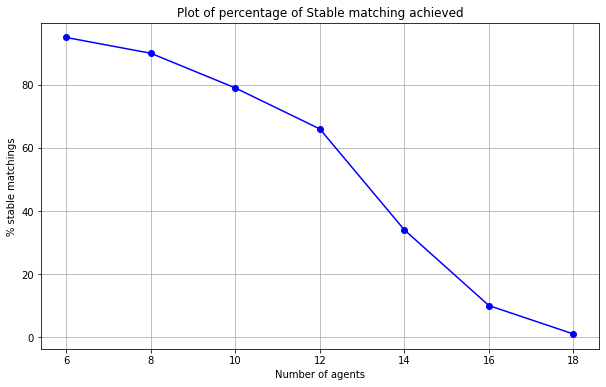

In [85]:
plt.figure(figsize=(10, 6))

#1000
plt.plot(result_simulation.keys(), result_simulation.values(), marker='o', linestyle='-', color='blue')
plt.xlabel('Number of agents')
plt.ylabel('% stable matchings')
plt.title('Plot of percentage of Stable matching achieved')
plt.grid(True)
plt.show()


## 2 --- Analysis of (asymptotic) Stability 

In [33]:
m, n, t = Thompson_Sampling(1000, 8)

In [91]:
def make_stability_plot_single(t, n_agents ):
    plt.figure(figsize=(10, 2))
    plt.imshow([t], aspect='auto',cmap='RdYlGn', interpolation='nearest')
    plt.title(f'Stability Analysis - {n_agents} Agents')
    cbar = plt.colorbar()
    cbar.set_ticks([0, n_agents/2])
    cbar.set_ticklabels(['Unstable', 'Stable'])
    plt.show()

In [92]:
def make_stability_plot(t, agents, subplot_index, total_plots):
    plt.subplot(total_plots, 1, subplot_index)
    plt.imshow([t], aspect='auto', cmap='RdYlGn', interpolation='nearest')
    plt.title(f'Heatmap for {agents} Agents')
    cbar = plt.colorbar()
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['Unstable', 'Stable'])

def compare_heatmaps(trials, agent_values):
    total_plots = len(agent_values)
    plt.figure(figsize=(10, 2 * total_plots))
    
    for i, agents in enumerate(agent_values):
        _, n, _ = Thompson_Sampling(trials, agents)
        make_stability_plot(n, agents, i + 1, total_plots)

    plt.tight_layout()
    plt.show()


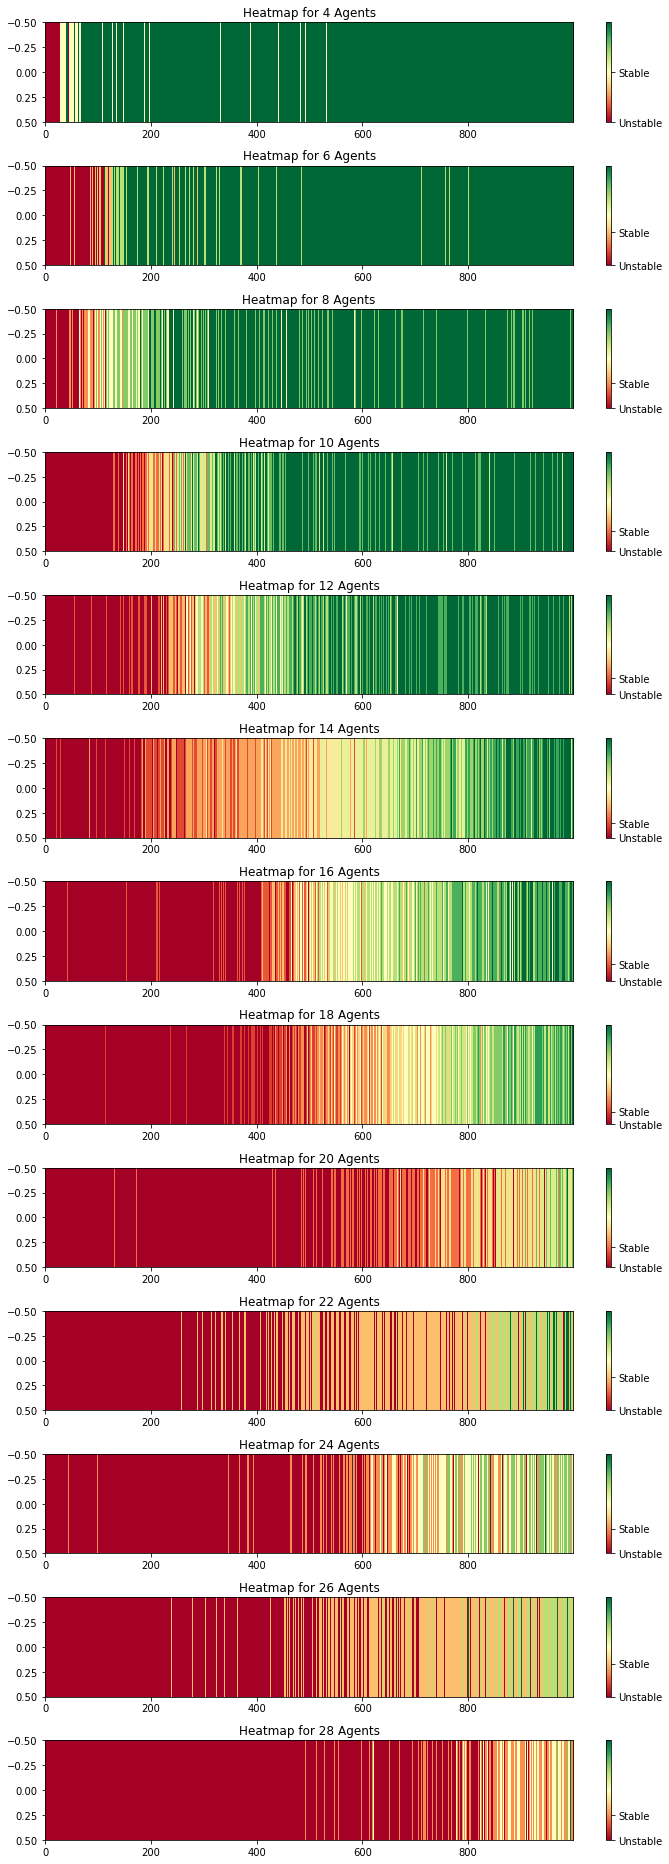

In [66]:
trials = 1000
agent_values = np.arange(4, 30, 2)  # Example values, adjust as needed

compare_heatmaps(trials, agent_values)

## Regret analisys

In [87]:
m, n, t, R, c = Thompson_Sampling(100000, 8)

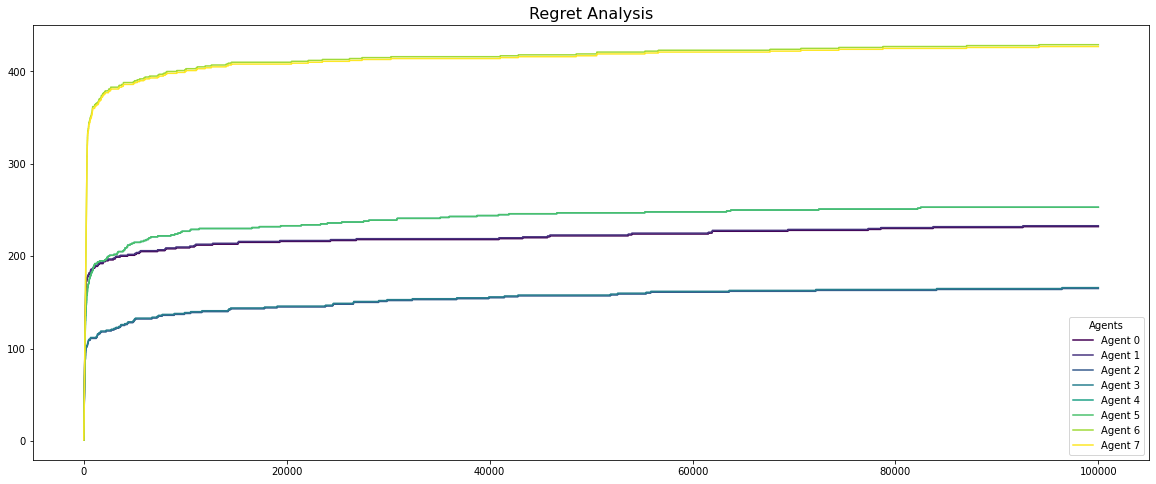

In [89]:

plt.figure(figsize=(20, 8))
# Define colors
colors = plt.cm.viridis(np.linspace(0, 1, 8))

# Plot data in a single plot with different colors
for i in range(8):
    plt.plot(R[i], label=f'Agent {i}', color=colors[i])

# Add title and legend
plt.title('Regret Analysis', fontsize=16)
plt.legend(title='Agents')

# Show plot
plt.show()


Text(0.5, 1.0, 'Cumulative Market Unstability')

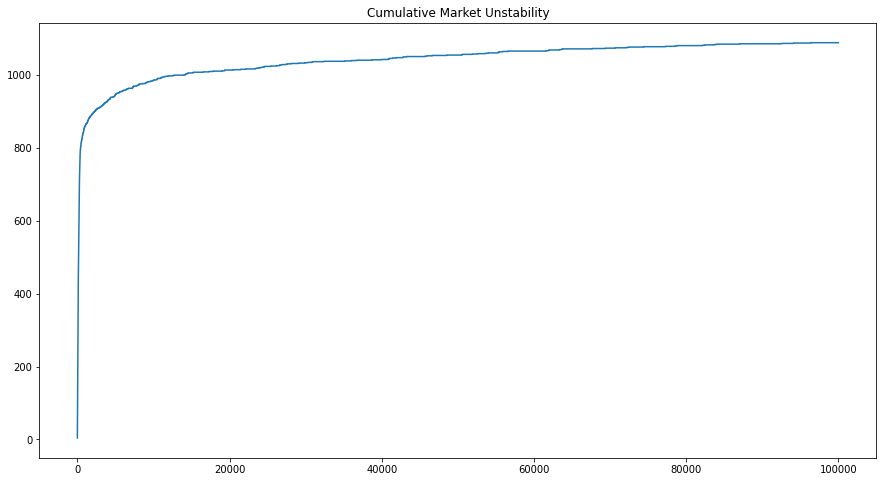

In [90]:
plt.figure(figsize=(15, 8))
plt.plot(c)
plt.title('Cumulative Market Unstability')

In [84]:
m

[(0, 1), (2, 3), (4, 5), (6, 7)]

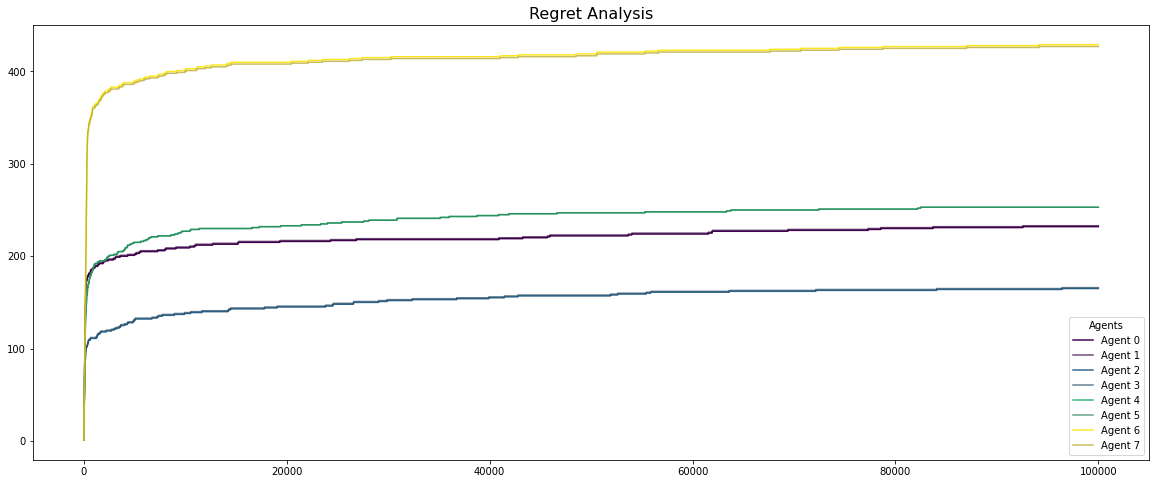

In [88]:

plt.figure(figsize=(20, 8))

# Define colors: Create 4 distinct color groups for the 8 agents
base_colors = plt.cm.viridis(np.linspace(0, 1, 4))
colors = np.empty((8, 4))

for i in range(4):
    colors[2 * i] = base_colors[i]
    colors[2 * i + 1] = base_colors[i] * 0.7  # Slightly darker version for the pair

# Plot data in a single plot with different colors
for i in range(8):
    plt.plot(R[i], label=f'Agent {i}', color=colors[i])

# Add title and legend
plt.title('Regret Analysis', fontsize=16)
plt.legend(title='Agents')

# Show plot
plt.show()


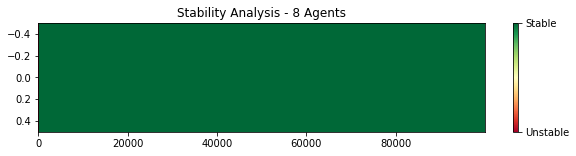

In [95]:
make_stability_plot_single(n, 8)


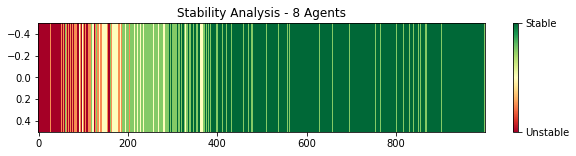

In [99]:
plt.figure(figsize=(10, 2))
plt.imshow([n[:1000]], aspect='auto',cmap='RdYlGn', interpolation='nearest')
plt.title(f'Stability Analysis - {8} Agents')
cbar = plt.colorbar()
cbar.set_ticks([0, 8/2])
cbar.set_ticklabels(['Unstable', 'Stable'])
plt.show()